# Análise Exploratória do Vestibular da Fatec do Primero Semestre do ano de 2025

> OBJETIVO: Nesse relatório tenho como objetivo entender o perfil dos inscritos no Vestibular para o 1º Semestre de 2025.

Espera-se entender:
- Existe uma maior população de homens ou mulheres entre os inscritos?
- Existe uma diferença significativa entre os gêneros?
- Existe uma propensão dos gêneros em certos cursos ou área de atuação (exata e humanas)?

### Hipóteses Iniciais
- É esperado que cursos mais relacionados a STEM, tenha uma maior população de homens que mulheres.


# 1. Carregando Bibliotecas

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Carregando Dataset

In [19]:
vf = pd.read_excel('data/resultado_fatec_2025_git.xlsx')

In [20]:
vf.head()

,Classificação,Inscrição,Vaga,Nota Final,Resultado,Primeiro_Nome,Gender,Unidade,Curso,Período,Área de estudo
0,1,2048247,Adamantina - Ciência de Dados - Noturno,79.48,Aprovado,LUCAS,M,Adamantina,Ciência de Dados,Noturno,Exatas
1,2,2000781,Adamantina - Ciência de Dados - Noturno,68.20,Aprovado,JULIANA,F,Adamantina,Ciência de Dados,Noturno,Exatas
2,3,2055545,Adamantina - Ciência de Dados - Noturno,64.20,Aprovado,LILIAN,F,Adamantina,Ciência de Dados,Noturno,Exatas
3,4,2027590,Adamantina - Ciência de Dados - Noturno,57.78,Aprovado,LUIZ,M,Adamantina,Ciência de Dados,Noturno,Exatas
4,5,2019439,Adamantina - Ciência de Dados - Noturno,56.65,Aprovado,CAIO,M,Adamantina,Ciência de Dados,Noturno,Exatas


In [21]:
vf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15930 entries, 0 to 15929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Classificação   15930 non-null  int64  
 1   Inscrição       15930 non-null  int64  
 2   Vaga            15930 non-null  object 
 3   Nota Final      15930 non-null  float64
 4   Resultado       15930 non-null  object 
 5   Primeiro_Nome   15930 non-null  object 
 6   Gender          15708 non-null  object 
 7   Unidade         15930 non-null  object 
 8   Curso           15930 non-null  object 
 9   Período         15930 non-null  object 
 10  Área de estudo  15930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 1.3+ MB


In [22]:
vf.describe()

,Classificação,Inscrição,Nota Final
count,15930.000000,1.593000e+04,15930.000000
mean,117.605399,2.045442e+06,44.341587
std,187.448575,2.605277e+04,11.019455
min,1.000000,2.000006e+06,7.060000
25%,23.000000,2.022137e+06,36.580000
50%,52.000000,2.047108e+06,43.450000
75%,118.000000,2.068030e+06,51.380000
max,1194.000000,2.089474e+06,96.250000


In [23]:
vf.shape

(15930, 11)

In [24]:
vf.columns

Index(['Classificação', 'Inscrição', 'Vaga', 'Nota Final', 'Resultado',
       'Primeiro_Nome', 'Gender', 'Unidade', 'Curso', 'Período',
       'Área de estudo'],
      dtype='object')

# 3. Análise Multivariada

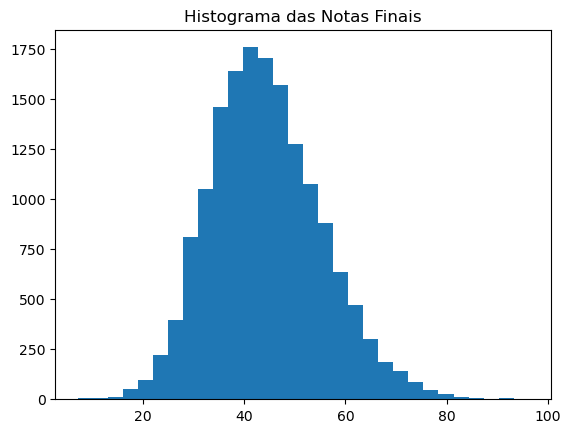

In [25]:
_ = plt.hist(vf['Nota Final'], bins=30)
_ = plt.title('Histograma das Notas Finais')

In [26]:
vf.Gender.value_counts()

Gender
M    10087
F     5621
Name: count, dtype: int64

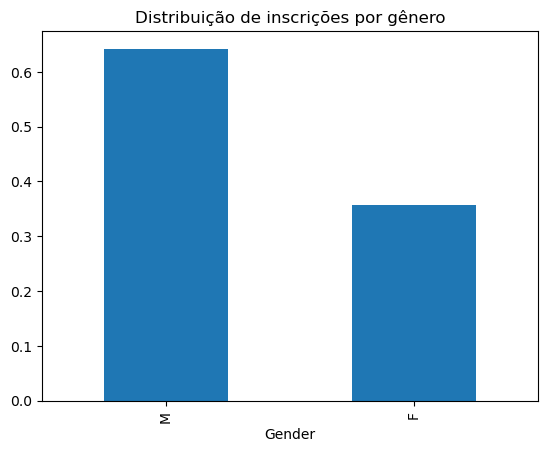

In [27]:
plt.title('Distribuição de inscrições por gênero')
_ = vf.Gender.value_counts(1).plot(kind='bar',)

Vemos que a maioria dos inscritos para o vestibular são homens.

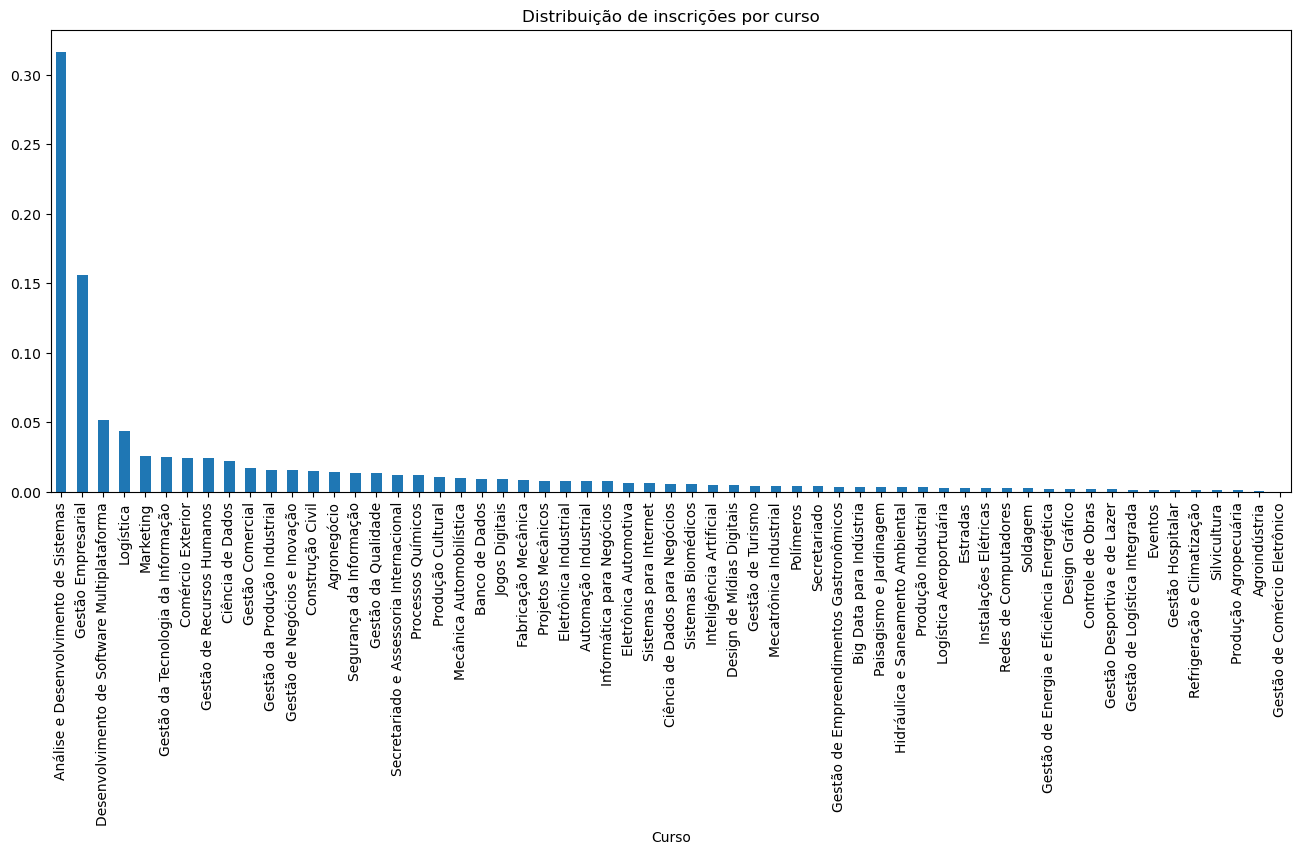

In [28]:
# Ajuste o tamanho da figura (largura, altura) em polegadas
plt.figure(figsize=(16, 6))
plt.title('Distribuição de inscrições por curso')
_ = vf.Curso.value_counts(1).plot(kind='bar',)

Vemos que o curso com maior número de inscrições é o Análise e Desenvolvimento de Sistemas (ADS), e em seguida o curso de Gestão Empresarial (EAD), por ser um curso à distancia, é esperado uma procura maior.

# 4. Analise  Bivariada

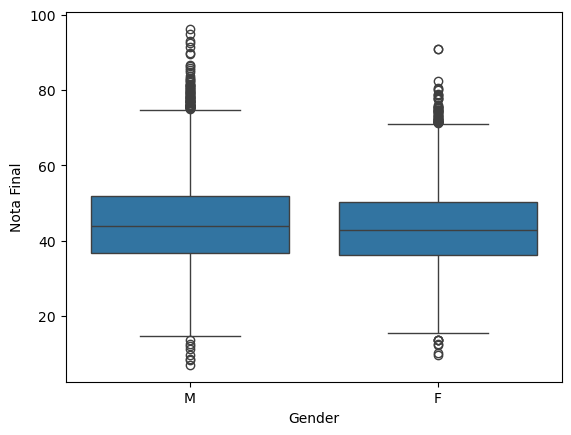

In [29]:
_ = sns.boxplot(x="Gender", y="Nota Final", data=vf)

# 5. Análise dos dados

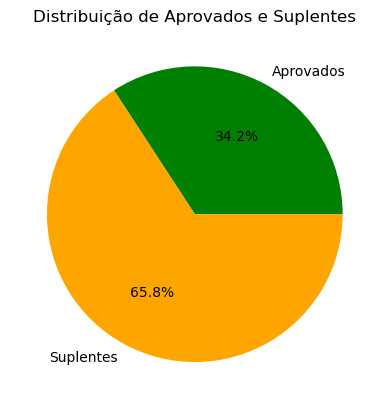

In [30]:
# Contagem dos resultados
qtd_aprovados = len(vf[vf['Resultado'] == 'Aprovado'])
qtd_suplente = len(vf[vf['Resultado'] == 'Suplente'])

# Criando o gráfico de pizza
plt.pie([qtd_aprovados, qtd_suplente], labels=["Aprovados", "Suplentes"], autopct="%1.1f%%", colors=['green', 'orange'])

# Adicionando título
plt.title("Distribuição de Aprovados e Suplentes")
plt.show()

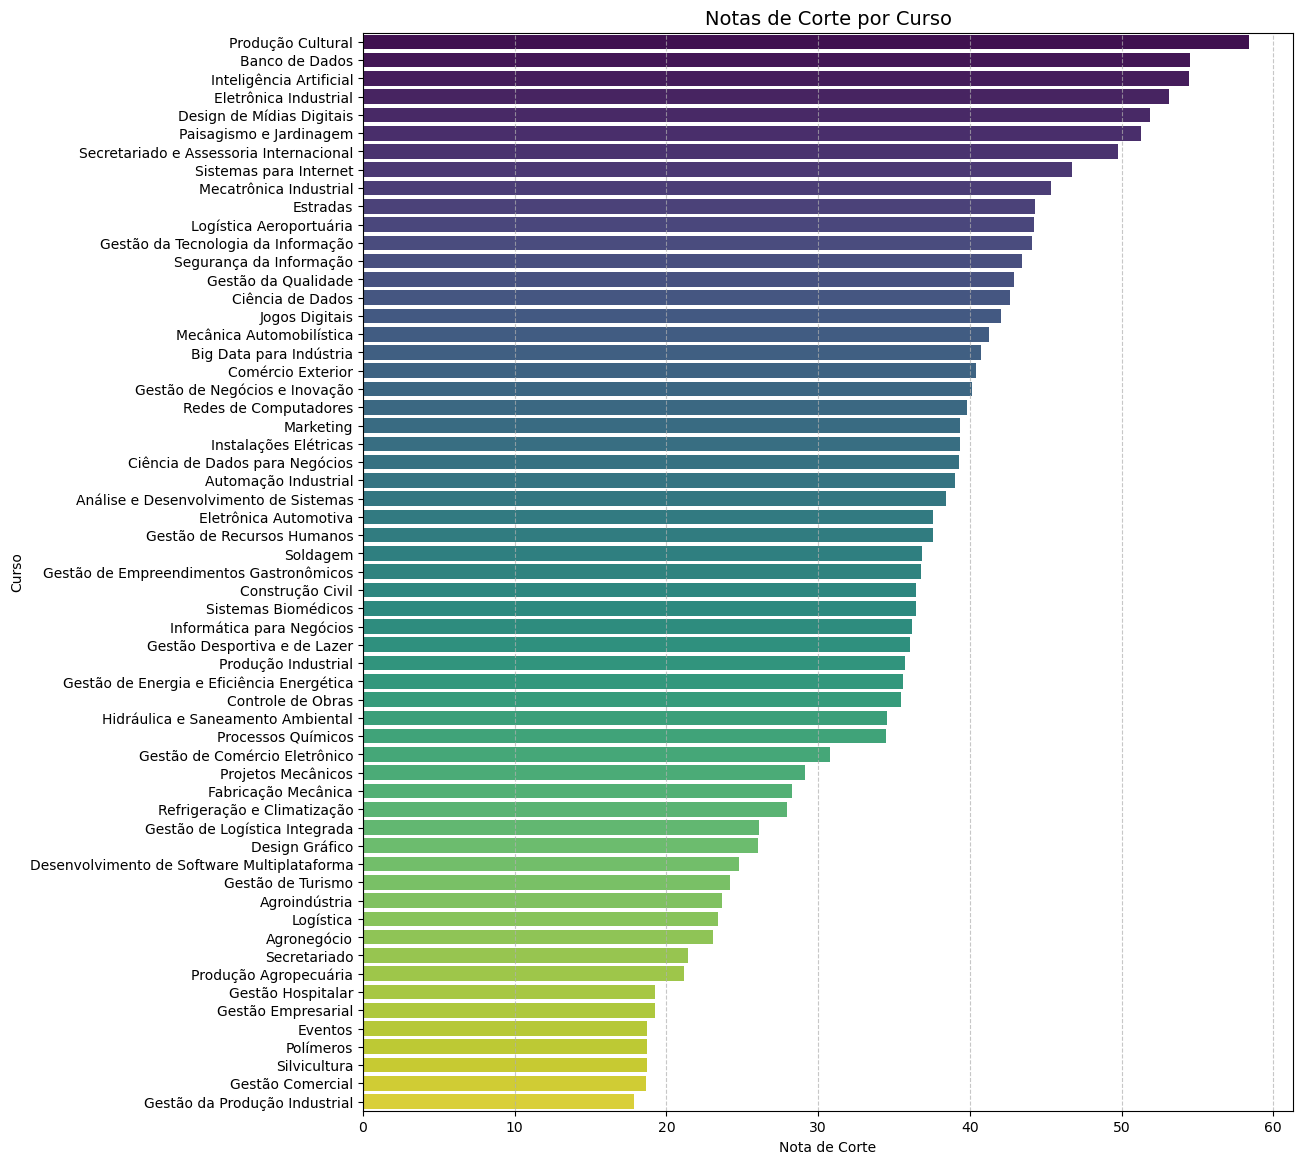

In [31]:
# Filtrar candidatos aprovados e converter 'Nota Final' para numérico
vf_aprovados = vf[vf['Resultado'] == 'Aprovado']

# Calcular a nota de corte para cada curso
nota_de_corte = vf_aprovados.groupby('Curso')['Nota Final'].min().sort_values(ascending=False)

# Plotar o gráfico de barras
plt.figure(figsize=(12, 14))
sns.barplot(x=nota_de_corte.values, y=nota_de_corte.index, hue=nota_de_corte.index, palette='viridis', dodge=False, legend=False)
plt.title('Notas de Corte por Curso', fontsize=14)
plt.xlabel('Nota de Corte')
plt.ylabel('Curso')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


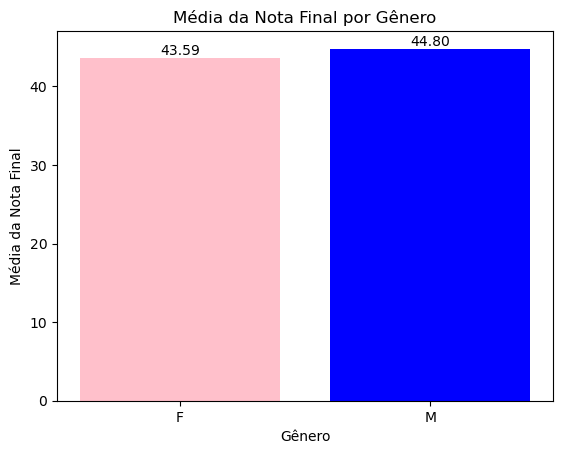

In [32]:
# Calcular a média da 'Nota Final' para cada gênero
media_notas_gênero = vf.groupby('Gender')['Nota Final'].mean()

# Criar o gráfico de barras
fig, ax = plt.subplots()
cores = {'M': 'blue', 'F': 'pink'}
barras = ax.bar(media_notas_gênero.index, media_notas_gênero.values, color=[cores[gênero] for gênero in media_notas_gênero.index])

# Adicionar os valores médios acima de cada barra
for barra in barras:
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width() / 2, altura, f'{altura:.2f}', ha='center', va='bottom')

# Configurar os rótulos e título do gráfico
ax.set_xlabel('Gênero')
ax.set_ylabel('Média da Nota Final')
ax.set_title('Média da Nota Final por Gênero')
plt.xticks(rotation=0)

# Exibir o gráfico
plt.show()

Existe um pouco mais de 1 ponto a mais para média das notas dos Homens.

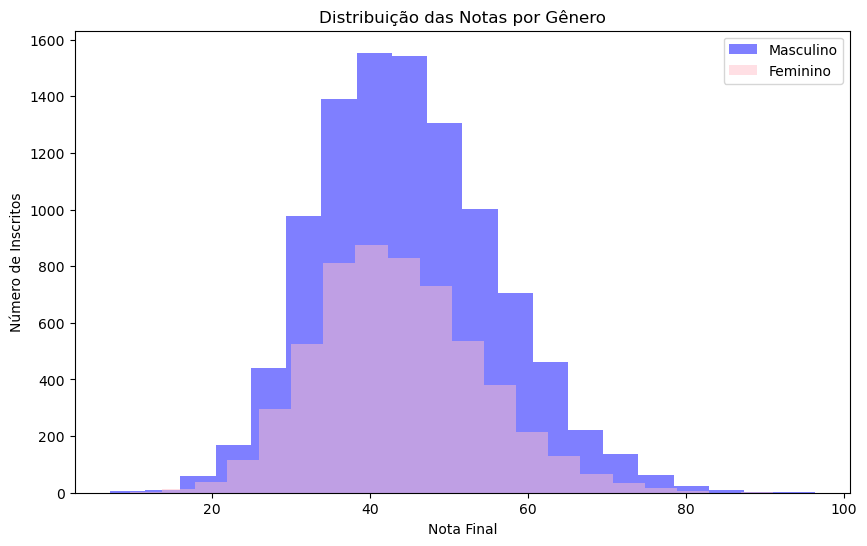

In [33]:
# Definir as cores para os gêneros
colors = {'M': 'blue', 'F': 'pink'}

# Criar o gráfico
plt.figure(figsize=(10, 6))

# Plotar o histograma para o gênero masculino
plt.hist(vf[vf['Gender'] == 'M']['Nota Final'], bins=20, alpha=0.5, label='Masculino', color=colors['M'])

# Plotar o histograma para o gênero feminino
plt.hist(vf[vf['Gender'] == 'F']['Nota Final'], bins=20, alpha=0.5, label='Feminino', color=colors['F'])

# Adicionar título e rótulos aos eixos
plt.title('Distribuição das Notas por Gênero')
plt.xlabel('Nota Final')
plt.ylabel('Número de Inscritos')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()

In [34]:
# Calcular a média da 'Nota Final' para cada gênero
media_notas_por_curso = vf.groupby('Curso')['Nota Final'].mean().sort_values(ascending=False)
media_notas_por_curso

Curso
Inteligência Artificial                        51.395366
Produção Cultural                              49.646294
Ciência de Dados para Negócios                 49.098587
Secretariado e Assessoria Internacional        48.043724
Paisagismo e Jardinagem                        47.513333
Banco de Dados                                 47.470065
Design de Mídias Digitais                      47.255733
Jogos Digitais                                 46.934966
Análise e Desenvolvimento de Sistemas          46.877794
Desenvolvimento de Software Multiplataforma    46.585639
Big Data para Indústria                        46.524655
Processos Químicos                             46.186051
Ciência de Dados                               45.902650
Gestão de Turismo                              45.833571
Mecatrônica Industrial                         45.454242
Projetos Mecânicos                             45.394962
Gestão de Negócios e Inovação                  45.234040
Estradas                 

É possível perceber que alguns cursos apresentam uma nota maior na média que outros: Inteligência Artificial, Produção Cultural, Ciência de Dados para Negócios, Secretariado e Assessoria Internacional, Paisagismo e Jardinagem, Banco de Dados, Design de Mídias Digitais, Jogos Digitais, Análise e Desenvolvimento de Sistemas...

Sendo a maior nota media do curso de Inteligência Artificial

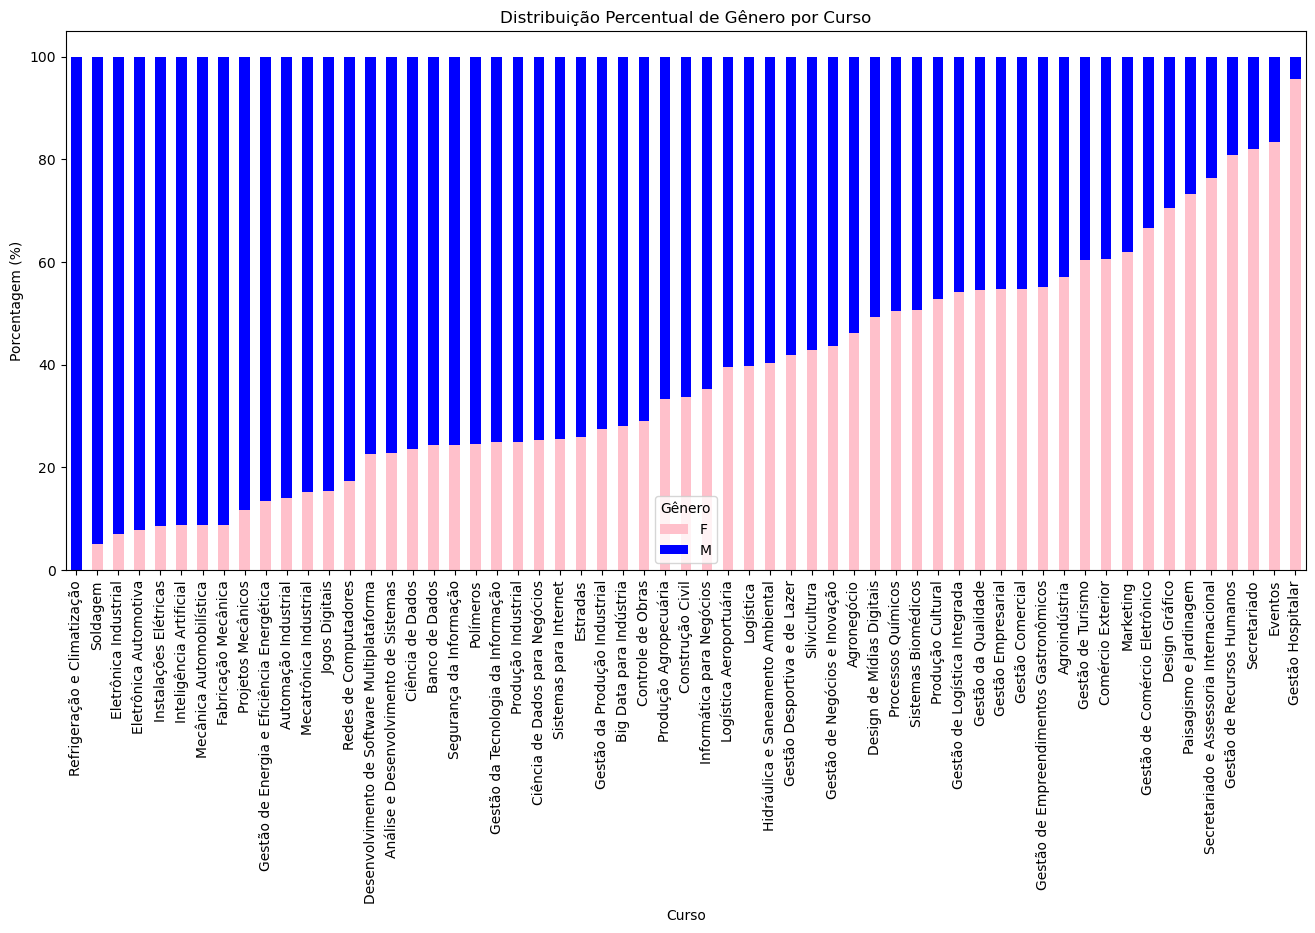

In [35]:
# Supondo que 'df' seja o seu DataFrame com as colunas 'Curso' e 'Gender'

# Passo 1: Agrupar os dados e contar as ocorrências de cada gênero por curso
grupo = vf.groupby(['Curso', 'Gender']).size().unstack(fill_value=0)

# Passo 2: Calcular as porcentagens
porcentagens = grupo.div(grupo.sum(axis=1), axis=0) * 100

# Passo 3: Calcular a diferença percentual entre homens e mulheres
# Supondo que os gêneros sejam representados como 'M' para masculino e 'F' para feminino
porcentagens['Diferença'] = porcentagens['M'] - porcentagens['F']

# Passo 4: Ordenar os cursos com base na diferença percentual
porcentagens_ordenadas = porcentagens.sort_values(by='Diferença', ascending=False)

# Passo 5: Remover a coluna de diferença para o plot
porcentagens_ordenadas = porcentagens_ordenadas.drop(columns='Diferença')

# Passo 6: Plotar o gráfico de barras empilhadas com os cursos ordenados e cores personalizadas
cores = ['pink', 'blue']  # Azul para 'M' e rosa para 'F'
porcentagens_ordenadas.plot(kind='bar', stacked=True, figsize=(16, 7), color=cores)

# Adicionar título e rótulos aos eixos
plt.title('Distribuição Percentual de Gênero por Curso')
plt.xlabel('Curso')
plt.ylabel('Porcentagem (%)')

# Adicionar legenda
plt.legend(title='Gênero')

# Exibir o gráfico
plt.show()


É possível perceber que existe uma diferença de interesse na distribuição inscrição de cursos por cada gênero.

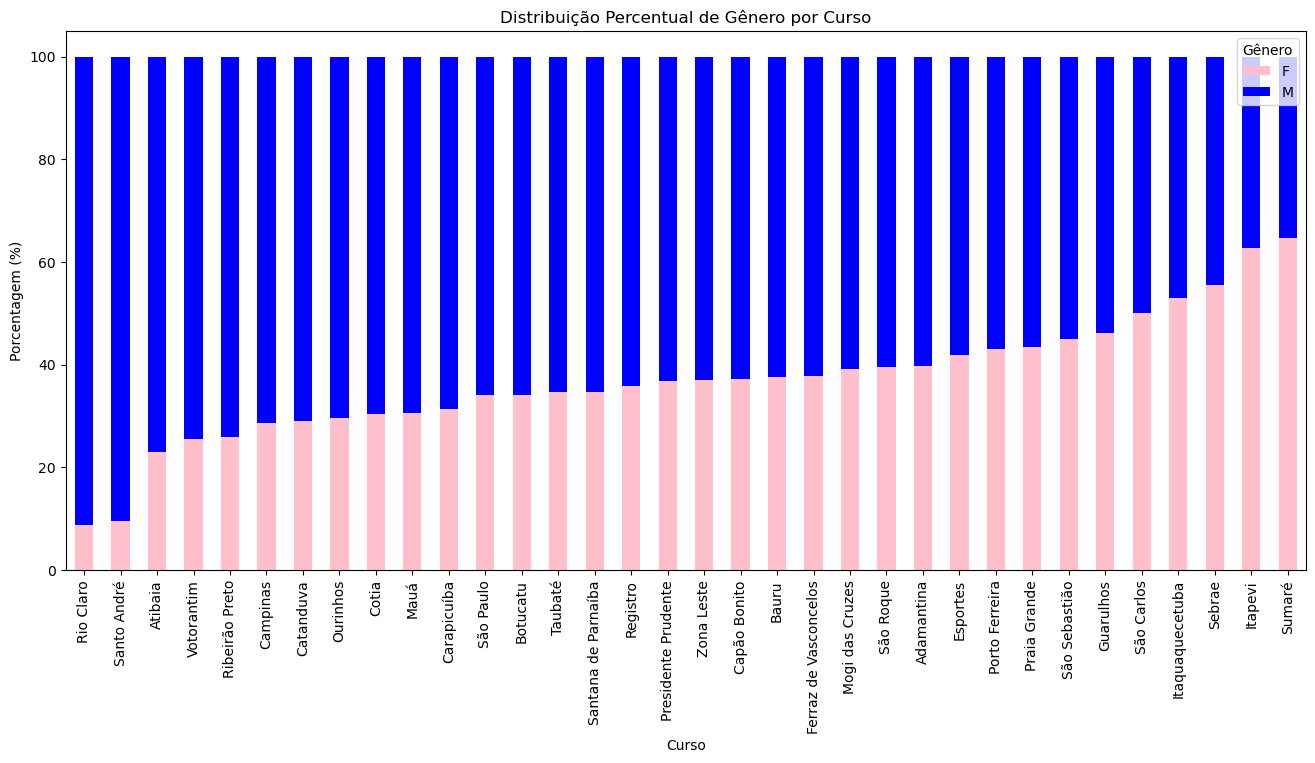

In [ ]:
# Supondo que 'df' seja o seu DataFrame com as colunas 'Unidade' e 'Gender'

# Passo 1: Agrupar os dados e contar as ocorrências de cada gênero por curso
grupo = vf.groupby(['Unidade', 'Gender']).size().unstack(fill_value=0)

# Passo 2: Calcular as porcentagens
porcentagens = grupo.div(grupo.sum(axis=1), axis=0) * 100

# Passo 3: Calcular a diferença percentual entre homens e mulheres
# Supondo que os gêneros sejam representados como 'M' para masculino e 'F' para feminino
porcentagens['Diferença'] = porcentagens['M'] - porcentagens['F']

# Passo 4: Ordenar os cursos com base na diferença percentual
porcentagens_ordenadas = porcentagens.sort_values(by='Diferença', ascending=False)

# Passo 5: Remover a coluna de diferença para o plot
porcentagens_ordenadas = porcentagens_ordenadas.drop(columns='Diferença')

# Passo 6: Plotar o gráfico de barras empilhadas com os cursos ordenados e cores personalizadas
cores = ['pink', 'blue']  # Azul para 'M' e rosa para 'F'
porcentagens_ordenadas.plot(kind='bar', stacked=True, figsize=(16, 7), color=cores)

# Adicionar título e rótulos aos eixos
plt.title('Distribuição Percentual de Gênero por Curso')
plt.xlabel('Curso')
plt.ylabel('Porcentagem (%)')

# Adicionar legenda
plt.legend(title='Gênero')

# Exibir o gráfico
plt.show()


É possível perceber que existe uma diferença de interesse na distribuição inscrição de unidades por cada gênero.

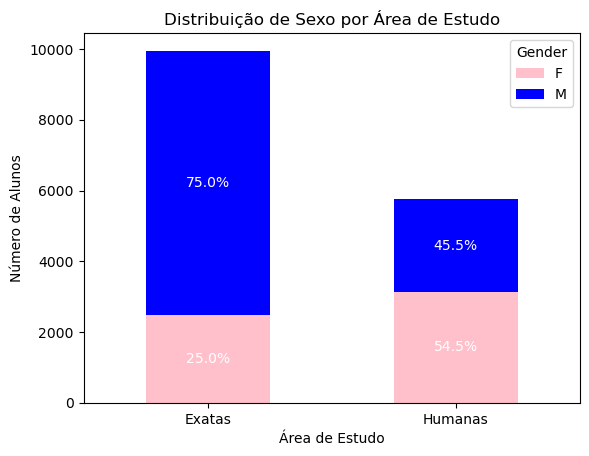

In [37]:
# Contagem de M e F por Área de estudo
contagem = vf.groupby(['Área de estudo', 'Gender']).size().unstack(fill_value=0)

# Calculando os percentuais
contagem_percentual = contagem.div(contagem.sum(axis=1), axis=0) * 100

# Criando o gráfico de barras empilhadas
ax = contagem.plot(kind='bar', stacked=True, color=['pink', 'blue'])

# Adicionando título e rótulos aos eixos
plt.title('Distribuição de Sexo por Área de Estudo')
plt.xlabel('Área de Estudo')
plt.ylabel('Número de Alunos')
plt.xticks(rotation=0)

# Adicionando os percentuais dentro das barras
for i, (area, row) in enumerate(contagem_percentual.iterrows()):
    for j, (sexo, percentual) in enumerate(row.items()):  # Corrigido para 'items()'
        # Calcular a posição no gráfico
        height = contagem.iloc[i, j]  # Quantidade de alunos
        width = 1  # A largura das barras é 1
        x = i  # Posição do eixo x (indivíduo da área de estudo)
        y = contagem.iloc[i, :j].sum()  # Posição no eixo y (começo da barra empilhada)
        
        # Adicionando o texto com o percentual no gráfico
        ax.text(x, y + height / 2, f'{percentual:.1f}%', ha='center', va='center', fontsize=10, color='white')

# Exibindo o gráfico
plt.show()

Pela Fatec ser uma Faculdade de Tecnologia, existe uma maior quantidade de inscrições relacionado as areas de exatas. Quase o dobro de inscrições foram para Exatas.

Dentro dos cursos de Exatas, 75% são homens e 25% são mulheres, isso demonstra que as mulheres não escolhem tanto esse tipo de curso.

Dentro dos cursos de Humanas, 45,5% são homens e 54,5% são mulheres, isso demonstra que as mulheres escolhem ligeiramente a mais que homens cursos de Humanas.